# Case Study 1: From Exploration to Design

- Name: Thanh Tuyen (Anna) Nguyen
- Student ID: 70090352
- Link to GitHub Repository: https://github.com/annanguyen0605/DSCI200_Case_study_1.git

This blank notebook is provided for you to use to answer questions from [Case Study 1](https://ubc-dsci.github.io/dsci-200/case-studies/case-study-1.html). 

In [2]:
install.packages('tidyverse')
devtools::install_github("lbelzile/hecedsm")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done




── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmppYAYlQ/remotesbc7c1177c2/lbelzile-hecedsm-df0a544/DESCRIPTION’ ... OK
* preparing ‘hecedsm’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
  NB: this package now depends on R (>= 4.1.0)
  pipe |> or function shorthand \(...) syntax added in R 4.1.0.
  File(s) using such syntax:
    ‘SKD23_S2A.Rd’
* building ‘hecedsm_2025.06.18.tar.gz’



In [3]:
library(tidyverse)
library(hecedsm)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘hecedsm’


The following object is masked from ‘package:stringr’:

    words




# I. Choosing Dataset

### 1. Load data (Dataset Chosen: BL22_E)

In [4]:
data <- BL22_E
head(data)
summary(data)

id,writer,cond,partner_time,task_time,room_time
<fct>,<lgl>,<fct>,<dbl>,<dbl>,<dbl>
1,TRUE,video,84.626,193.868,20.026
1,FALSE,video,122.026,144.806,33.150
2,TRUE,video,86.122,125.630,88.740
2,FALSE,video,89.828,116.518,93.500
3,FALSE,f2f,1.632,255.816,41.480
4,FALSE,video,118.694,160.956,17.578


       id        writer           cond      partner_time       task_time      
 1      :  2   Mode :logical   f2f  :126   Min.   :  0.068   Min.   :  1.156  
 2      :  2   FALSE:131       video:144   1st Qu.: 25.968   1st Qu.:142.222  
 4      :  2   TRUE :139                   Median : 53.975   Median :189.550  
 5      :  2                               Mean   : 72.842   Mean   :181.094  
 6      :  2                               3rd Qu.:111.987   3rd Qu.:232.704  
 7      :  2                               Max.   :287.062   Max.   :294.780  
 (Other):258                                                                  
   room_time      
 Min.   :  0.102  
 1st Qu.: 13.974  
 Median : 31.909  
 Mean   : 45.751  
 3rd Qu.: 69.606  
 Max.   :254.150  
                  

### 2. Summary of the study

The primary objective of this study was to examine how virtual communication via videoconferencing affects collaborative creative idea generation compared to in-person interaction. Motivated by the rapid expansion of remote work accelerated by COVID-19, the authors sought to understand whether replacing face to face collaboration with virtual meetings imposes cognitive costs on innovation, which is foundational to scientific and commercial progress. While prior research focused on how communication technologies influence information exchange, this study aimed to isolate the effects of the physical nature of interaction itself.

The study is important because organizations increasingly rely on virtual collaboration, yet creativity is critical for problem-solving, research, and competitive advantage. Understanding whether and how videoconferencing alters creative processes has direct implications for workplace design, team management, and innovation strategy.

The authors hypothesized that videoconferencing would reduce the number of creative ideas generated, but not necessarily impair the ability to evaluate or select ideas. Through laboratory and field experiments across five countries, they tested whether virtual interaction narrows cognitive focus, predicting that this constrained attention would suppress idea generation while leaving evaluative decision-making relatively unaffected.

# II. Data exploration

### 3. Dataset characteristics

In [5]:
head(data)
glimpse(data)

id,writer,cond,partner_time,task_time,room_time
<fct>,<lgl>,<fct>,<dbl>,<dbl>,<dbl>
1,TRUE,video,84.626,193.868,20.026
1,FALSE,video,122.026,144.806,33.150
2,TRUE,video,86.122,125.630,88.740
2,FALSE,video,89.828,116.518,93.500
3,FALSE,f2f,1.632,255.816,41.480
4,FALSE,video,118.694,160.956,17.578


Rows: 270
Columns: 6
$ id           <fct> 1, 1, 2, 2, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10…
$ writer       <lgl> TRUE, FALSE, TRUE, FALSE, FALSE, FALSE, TRUE, TRUE, FALSE…
$ cond         <fct> video, video, video, video, f2f, video, video, video, vid…
$ partner_time <dbl> 84.626, 122.026, 86.122, 89.828, 1.632, 118.694, 24.684, …
$ task_time    <dbl> 193.868, 144.806, 125.630, 116.518, 255.816, 160.956, 245…
$ room_time    <dbl> 20.026, 33.150, 88.740, 93.500, 41.480, 17.578, 21.828, 3…


### 4. Data description

- There are 6 variables and 270*6 = 1620 observations.
  
- Categorical variables:

  + id (factor): identifies each participant or pair.

  + cond (factor): represents the communication condition (e.g., video vs. face-to-face).

  + writer (logical): a binary categorical variable indicating whether the person was randomly assigned to be the writer (TRUE or FALSE).

- Numerical variables:

  + partner_time (double): time spent interacting with/looking at a partner (in seconds).

  + task_time (double): time spent looking at the task computer (in seconds).

  + room_time (double): time spent looking around the room (in seconds).

### 5. Converting data

The numerical variables (`partner_time`, `task_time`, and `room_time`) are already stored as continuous numeric values and are suitable for further exploration of the data. Convert `writer` to a factor instead of logical binary. This ensures it is treated as a categorical predictor in analyses such as group comparisons or regression.

In [6]:
data$writer <- as.factor(data$writer)

### 6. Missing values

In [7]:
colSums(is.na(data))
colMeans(is.na(data)) * 100

id       writer         cond partner_time    task_time    room_time 
           0            0            0            0            0            0

id       writer         cond partner_time    task_time    room_time 
           0            0            0            0            0            0

There is no missing value (NA values) for all of the variables in the dataset. Therefore, 0% of the all variables in the dataset is missing values.

### 7. Class imbalance

In [8]:
summary(data)

       id        writer       cond      partner_time       task_time      
 1      :  2   FALSE:131   f2f  :126   Min.   :  0.068   Min.   :  1.156  
 2      :  2   TRUE :139   video:144   1st Qu.: 25.968   1st Qu.:142.222  
 4      :  2                           Median : 53.975   Median :189.550  
 5      :  2                           Mean   : 72.842   Mean   :181.094  
 6      :  2                           3rd Qu.:111.987   3rd Qu.:232.704  
 7      :  2                           Max.   :287.062   Max.   :294.780  
 (Other):258                                                              
   room_time      
 Min.   :  0.102  
 1st Qu.: 13.974  
 Median : 31.909  
 Mean   : 45.751  
 3rd Qu.: 69.606  
 Max.   :254.150  
                  

Both the categorical variables `cond` `writer` both have the same amount of observations/valuea (both have 270 observations), thus there is no missing value for any of the variable in the dataset, which means there is no class imbalance between the two categorical variables `cond` and `writer`.

# III. Data visualization 

### 8. Relationship between 2 variables plot

I want to see the relationship between `partner_time` and `task_time`, to see that among the writers and non-writers, does looking at the tasks make them spend less time looking at their partner or not. I will use scatterplot for this one. A scatterplot is appropriate because it allows me to examine the relationship between two continuous numerical variables. It helps identify potential trends, correlations, or outliers between partner interaction time and task completion time.

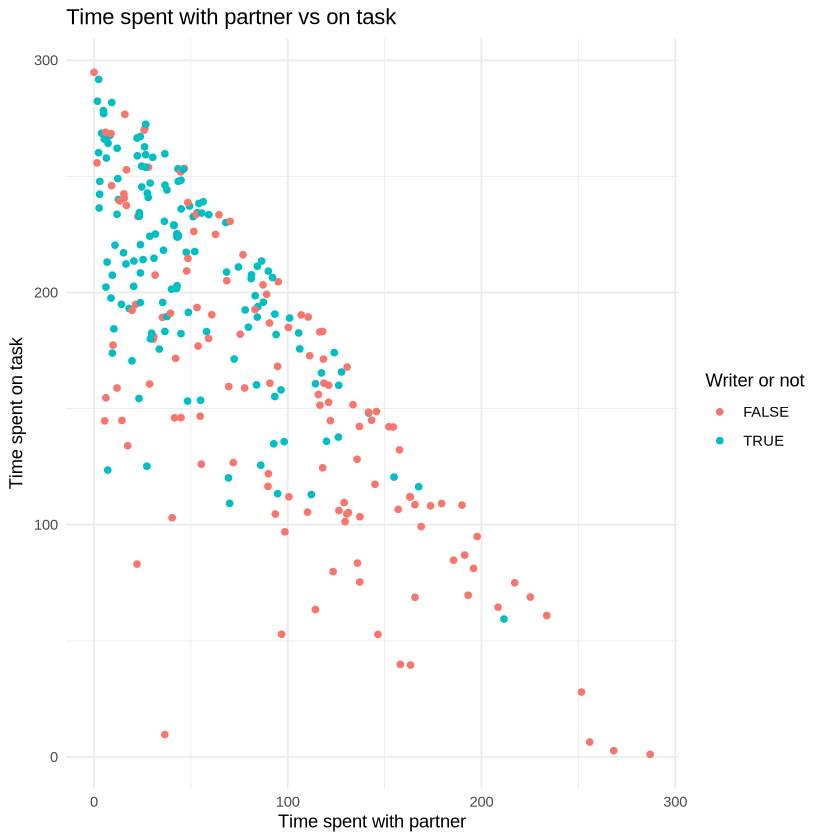

In [9]:
partner_vs_task <- ggplot(data, aes(x = partner_time, y = task_time, color = writer)) +
                   geom_point() +
                   labs(x = "Time spent with partner", y = "Time spent on task", color = "Writer or not", title = "Time spent with partner vs on task") +
                   theme_minimal()
partner_vs_task

There is a pretty strong negative relationship between the two variables: the more time the writers spent looking at the tasks, the less time they spent looking at their partner. They spent less time looking at their partner if they are looking at the task compared to the non-writers (the blue dots indicating writers are mostly on the higher left side of the plot, while the orange dots indicating non-writers are spread out more, so it means the writers spent less time looking at their partner compared to non-writers). However, other factors likely influence task time as well.

### 9. Distribution of 1 variable

I want to see the distribution of `room_time`. I will use histogram as it is a continuous numerical variable, because it helps me understanding the overall shape of the distribution, identifying peaks (modes), and spotting skewness and outliers of the variable.

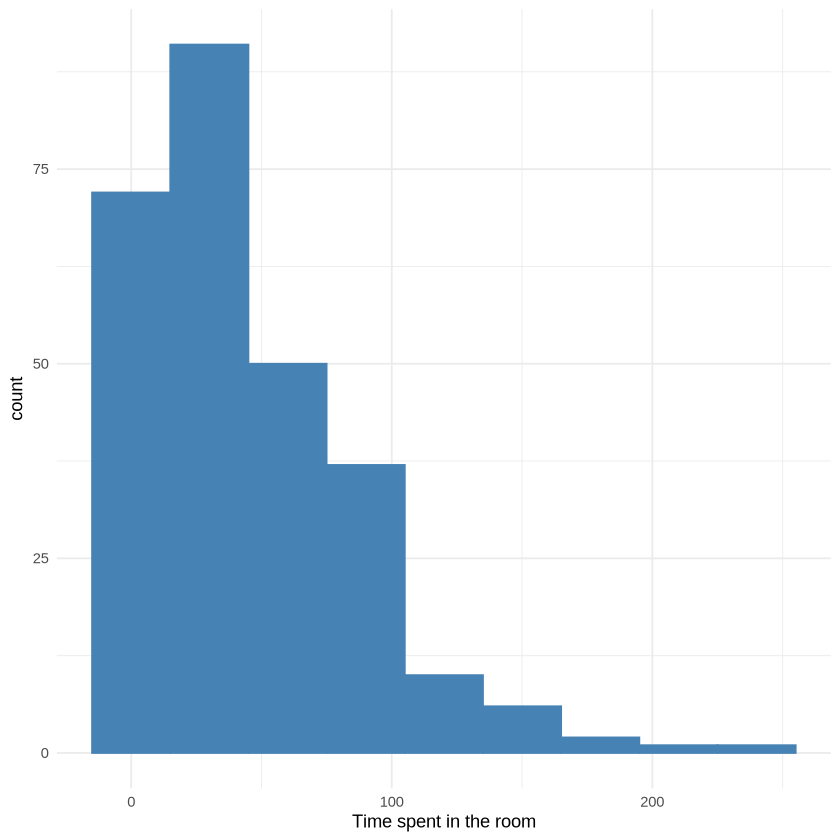

In [10]:
hist_room <- ggplot(data, aes(x = room_time)) +
             geom_histogram(binwidth = 30, fill = "steelblue", color = "steelblue") +
             labs(x = "Time spent in the room") +
             theme_minimal()
hist_room

The distribution of `room_time` is right-skewed, with most observations concentrated at lower values and a long tail extending toward higher values. This indicates that while most participants spent a relatively short amount of time looking around the room, a small number spent substantially longer time.

### 10. Numerical vs categorical variable

I will pick `cond` and `task_time` to examine whether the meeting condition impacts the time participants spent looking at the task. Since task_time is a numerical variable and cond is categorical, a boxplot is used to compare the distribution of task times across the two meeting conditions.

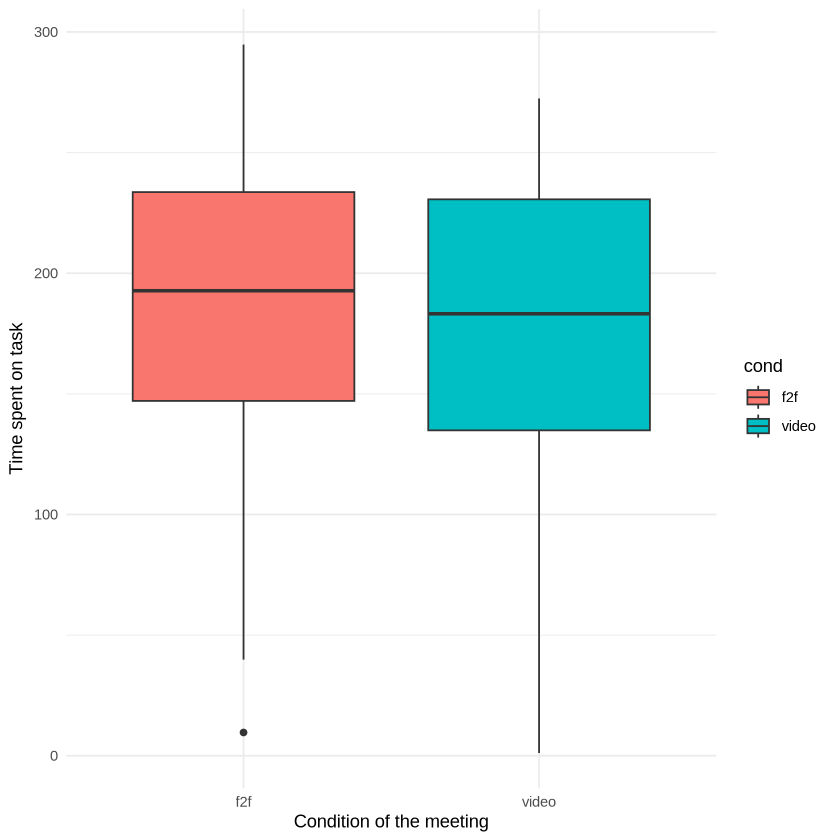

In [11]:
num_vs_cat <- ggplot(data, aes(x = cond, y = task_time, fill = cond)) +
              geom_boxplot() +
              labs(x = "Condition of the meeting", y = "Time spent on task") +
              theme_minimal() 
num_vs_cat

The median time spent on the task is slightly higher for participants in the face-to-face condition compared to those in the video condition. In addition, both the first and third quartiles for the face-to-face condition are higher than those for the video condition, indicating that participants working face-to-face generally tend to spend more time looking at the task than those meeting via video call.

### 11. Categorical variable

I will be picking `cond` to see the distribution between the two types of meeting forms that participants used.

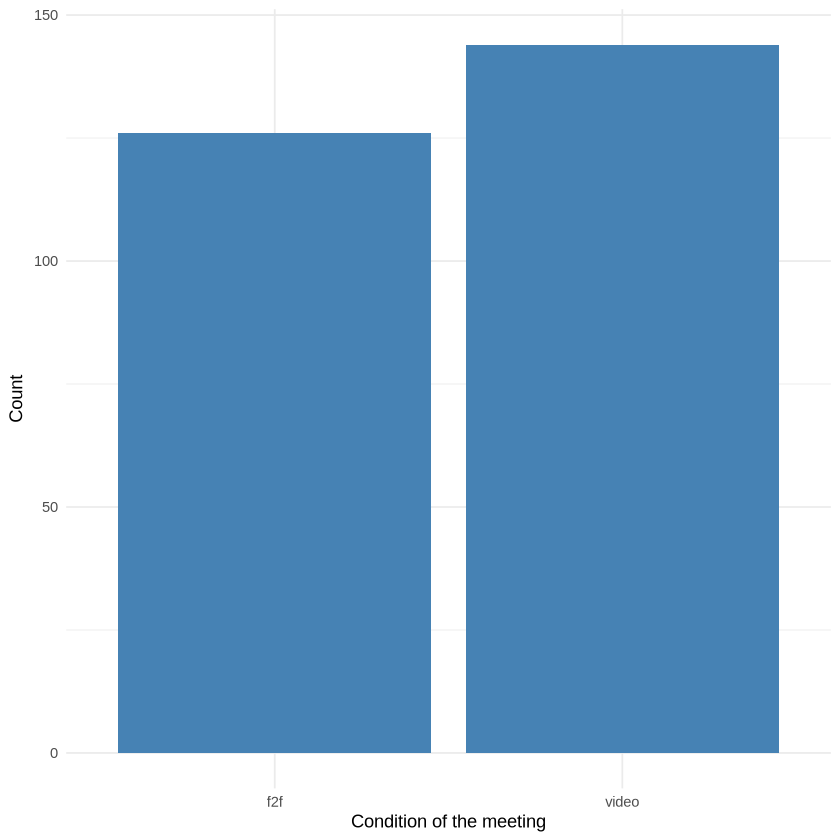

In [12]:
catvar <- ggplot(data, aes(x = cond)) +
  geom_bar(fill = "steelblue") +
  labs(x = "Condition of the meeting", y = "Count") +
  theme_minimal() 
catvar

The distribution of condition of the meeting is spread pretty fairly among two types of meeting. While the video format has more observations, it is not significantly bigger than the face-to-face type of meeting. There is no "typical value" for this categorical variable because it is categorical nor numerical, there is no mean or median for a "typical value".

# IV. Summary statistics

### 12. Central tendency

I chose `room_time` as the numerical variable. The median is an appropriate measure of central tendency because the distribution of room time is right-skewed with several large values, as shown in the histogram in #9 previously. The median is less affected by extreme values than the mean and therefore better represents a typical amount of time spent in the room.

In [16]:
median(data$room_time)

[1] 31.909

The median time spent in the room is 31.9 seconds, which better represents a typical value than the mean due to the right-skewed distribution of `room_time` variable

### 13. Summary statistics

I chose `cond` as the categorical variable of interest. A relevant summary statistic for this variable is the count of observations in each category, as categorical variables are best summarized by frequencies rather than numerical measures. The counts show that the video condition has slightly more observations than the face-to-face condition, indicating that the dataset is relatively balanced across meeting conditions. This information is useful because it helps identify potential class imbalance that could affect comparisons between groups.

In [17]:
table(data$cond)


  f2f video 
  126   144 

### 14. Relationship between 2 variables

I chose `room_time` and `task_time` to measure their relationship. Since both variables are numerical, the Pearson correlation coefficient is an appropriate measure of association. 

In [19]:
cor(data$room_time, data$task_time)

[1] -0.4238584

The correlation value indicates a moderate negative/inverse relationship between room time and task time, meaning that participants who spend more time looking around the room would likely spend less time looking at the task on the computer.

# V. Develop a question

### 15. Research question

#### Does the condition of the meeting (face-to-face vs video) affect how participants allocate their time between looking at their partner, the task, and the surrounding room?

I think this research question is appropriate because the dataset contains detailed measures of how participants allocate their time during meetings, including time spent on the task, time spent looking at their partner, and time spent looking around the room, as well as the meeting condition (face-to-face or video). These variables allow me to examine whether different meeting conditions are associated with different patterns of attention and time allocation. Exploring this relationship helps me better understand how virtual versus in-person meetings may influence participant behavior.

### 16. Split dataset or not?

I think I won't need to split the data into training and test sets. The goal of my research question is to explore and describe relationships between variables in the dataset (relationships between a categorical variable and 3 numercial variables), rather than to build a predictive model. Train–test splits are mainly used for prediction tasks, not for exploratory or descriptive analysis, so I do not think I need to split the dataset into trainining and testing sets.

### 17. Create a new feature

In [21]:
data$room_time_ratio <- data$room_time /(data$room_time + data$task_time + data$partner_time)
head(data)

id,writer,cond,partner_time,task_time,room_time,room_time_ratio
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,TRUE,video,84.626,193.868,20.026,0.06708428
1,FALSE,video,122.026,144.806,33.150,0.11050663
2,TRUE,video,86.122,125.630,88.740,0.29531568
2,FALSE,video,89.828,116.518,93.500,0.31182674
3,FALSE,f2f,1.632,255.816,41.480,0.13876251
4,FALSE,video,118.694,160.956,17.578,0.05913978


I created a new variable called `room_time_ratio`, which measures the proportion of total observed time that participants spent looking around the room. This variable is created by dividing room time by the sum of room time, task time, and partner time. It is useful because it standardizes room attention across participants and makes it easier to compare attention patterns between face-to-face and video conditions.

# VI. Describe design

### 18. Type of data analysis in the original paper

The authors of the original paper was trying to address the casual analysis questions. Since they aim to determine whether working virtually versus face-to-face causes differences in creative idea generation and decision quality. They also use inferential analysis to generalize their findings from the observed samples to broader populations of workers and collaborators. The use of randomized assignment and controlled experimental conditions supports these goals.

### 19. Population vs sample of the original paper

The population of interest in the original paper are individuals who collaborate to generate and evaluate ideas (espeically creative ideas) in professional or organizational settings, particularly in both face-to-face and virtual environments. The observed samples include university students and staff who participated in controlled laboratory experiments, as well as professional engineers who took part in field experiments conducted at a multinational telecommunications company across five countries. 

### 20. Type of study

The type of study of the original paper is an controlled experiment study. Participants were randomly assigned to either a face-to-face or videoconferencing condition, meaning the researchers actively manipulated the explanatory variable while holding other conditions constant, which means the scientists have actively intervened in the process of the experiment, which is controlled experiement study. Random assignment helps reduce confounding and allows for causal conclusions to be drawn.

# VII. Study design

### 21. Potential confounding variables

The researchers controlled for potential confounding variables primarily through random assignment, which helps ensure that participant characteristics such as creativity, experience, or motivation are balanced across conditions. Additionally, they standardized task instructions, time limits, incentives, and physical setups so that meeting modality was the primary systematic difference between groups. These design choices reduce the influence of confounding variables on the results.

### 22. Type of sampling

The authors primarily used convenience sampling for the laboratory experiments by recruiting university students and staff, and organizational sampling for the field experiment by working with engineers from a single multinational firm. This approach allowed the researchers to conduct tightly controlled experiments and access real-world professional collaboration settings, which would be difficult to achieve using random population sampling. 

### 23. Potential sources of sampling bias

Potential sources of sampling bias is the scientists relied on specific participant pools, such as college undergraduates in laboratory settings and engineers from a single multinational telecommunications firm for field experiments, which may not represent the broader workforce. This concentration in particular professional and academic environments, combined with the fact that the field study was conducted across only five countries, might limit the generalizability of the findings to different industries or cultures. Additionally, the engineers were recruited for an "ideation workshop," suggesting a potential self-selection bias where participants may have been more naturally inclined toward creativity or collaboration than the average employee. Finally, the study's focus on randomly assigned pairs rather than established, larger, or more diverse teams may not fully capture the complex group dynamics typical of real-world innovation.

# VIII. 

### 24.

1. Alternative sampling and design methods
If I were to redesign this study, I would consider two primary adjustments:

- Longitudinal Field Design: Instead of a one-time "ideation workshop", I would track established teams over several months. This would allow for the observation of how team dynamics and creativity evolve as members become more comfortable with virtual tools or experience "Zoom fatigue" over time.

- Stratified Diversity Sampling: I would broaden the participant pool to include industries beyond telecommunications and academia (e.g., arts, social services, or manufacturing). This would help determine if the "screen-focus" effect is universal or if it varies based on professional training or the nature of the creative task.

=> These changes might show that the negative effects of virtual communication diminish as teams develop specific digital collaboration "etiquette" or, conversely, that the effects are even more pronounced in less technical fields where visual/physical cues are more critical to the creative process.

2. The authors likely selected a controlled lab study and a multi-country field experiment for these following reasons:


- Establishing causality: The laboratory experiment allowed for high internal validity by controlling variables like screen size (15.6-inch MacBook Pros) and the removal of "self-view" , which isolated the physical effect of the screen on eye-gaze and cognitive focus.

- Immediate scalability: Using a large multinational firm provided a massive sample size (1,490 engineers) and high ecological validity, proving that the laboratory findings weren't just "student effects" but applied to domain experts in their natural working environments.

- Resource efficiency: Tracking teams over months (longitudinal) is significantly more expensive and prone to "attrition bias" (people quitting the study) compared to a structured workshop.

3. Limitations and challenges of proposed approaches
While my proposed approach aims for greater generalizability, it introduces significant hurdles:

- Confounding variables: In a longitudinal field study, it is nearly impossible to control for external factors like individual home-office environments, internet stability, or personal life stressors, which could mask the specific effects of the communication modality itself.

- Complexity of data collection: Gathering eye-gaze and recall data (crucial for the authors' "narrowed focus" theory)  is far more difficult to execute reliably in a long-term, remote setting than in a controlled lab or a single-day workshop.

- Participant burden: Asking employees to maintain rigorous reporting over months can lead to "survey fatigue," potentially reducing the quality of the ideas generated simply because participants are tired of the study itself.